In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [15]:
plt.style.use('bmh')

In [16]:
df = pd.read_csv('NCHS.csv')
df.head()

,Year,Race,Sex,AvgLifeExp,AgeAdjDR
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 5 columns):
Year          1044 non-null int64
Race          1044 non-null object
Sex           1044 non-null object
AvgLifeExp    1035 non-null float64
AgeAdjDR      1044 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 40.9+ KB


In [18]:
df.dropna(inplace=True)

count    1035.000000
mean       64.117295
std        11.786490
min        29.100000
25%        56.600000
50%        66.600000
75%        73.600000
max        81.400000
Name: AvgLifeExp, dtype: float64


C:\Users\LLClasen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


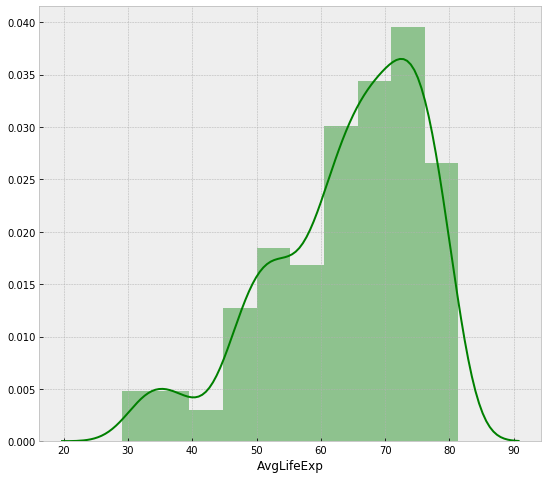

In [19]:
print(df['AvgLifeExp'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['AvgLifeExp'], color='g', bins=10, hist_kws={'alpha': 0.4});

With this plot we can see that the average life expectancy is skewed left and some outliers exist below 45. We will want to get rid of the them to get a normal distribution of the independent variable (`AvgLifeExp`).

In [20]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [21]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Year,AvgLifeExp,AgeAdjDR
1,2014,78.9,724.6
2,2013,78.8,731.9
3,2012,78.8,732.8
4,2011,78.7,741.3
5,2010,78.7,747.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C6077D438>,
      dtype=object)

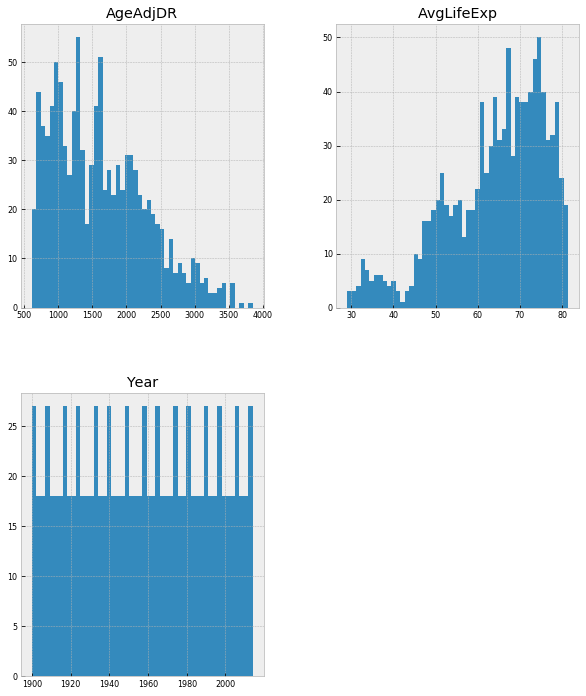

In [22]:
df_num.hist(figsize=(10, 12), bins=50, xlabelsize=8, ylabelsize=8)

It is interesting to see the opposing skews between age-adjusted death rates and life expectancy.

In [25]:
df['AvgLifeExp'].mean()

64.11729468599037

In [26]:
#to find the mode of AvgLifeExp
from collections import Counter
data = Counter(df['AvgLifeExp'])
data.most_common()   # Returns all unique items and their counts
data.most_common(1)

[(66.8, 11)]

In [27]:
df['AvgLifeExp'].var()

138.92133503396593

In [28]:
df['AvgLifeExp'].std()

11.786489512741523

In [29]:
df['AgeAdjDR'].mean()

1621.3031884057966

In [30]:
#to find the mode of AgeAdjDR
data = Counter(df['AgeAdjDR'])
data.most_common()   # Returns all unique items and their counts
data.most_common(1)

[(925.8, 2)]

In [31]:
df['AgeAdjDR'].var()

457501.502784795

In [32]:
df['AgeAdjDR'].std()

676.3885738130081

In [55]:
import numpy as np
import thinkstats2
import thinkplot

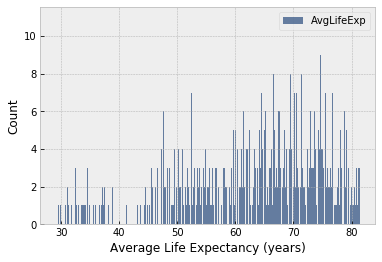

In [56]:
#Histogram of Average Life Expectancy
hist = thinkstats2.Hist(df['AvgLifeExp'], label='AvgLifeExp')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Average Life Expectancy (years)', ylabel='Count')

In [57]:
#We normalize the disrtibution by dividing through by the total count and getting a PMF.
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

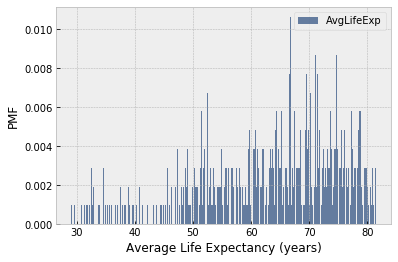

In [58]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Average Life Expectancy (years)', ylabel='PMF')

In [59]:
pmf = thinkstats2.Pmf(df['AgeAdjDR'], label='AgeAdjDR')

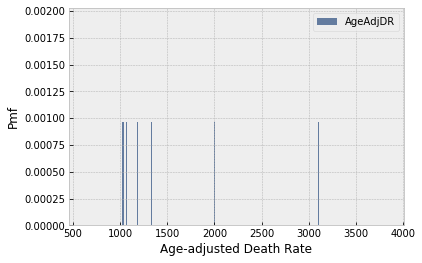

In [60]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Age-adjusted Death Rate', ylabel='Pmf')

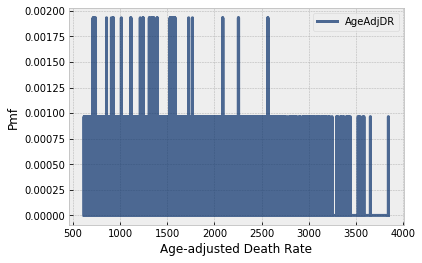

In [61]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Age-adjusted Death Rate', ylabel='Pmf')

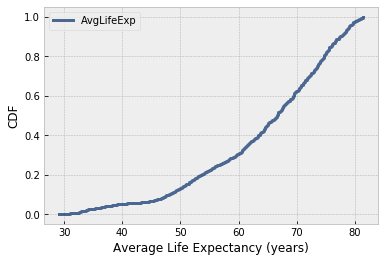

In [62]:
cdf = thinkstats2.Cdf(df['AvgLifeExp'], label='AvgLifeExp')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Average Life Expectancy (years)', ylabel='CDF', loc='upper left')

The CDF shows us some useful information if we consider percentiles. It looks like less than 10% of reported life expectancies are below 45 years, and nearly 50% of expextancies are above 60 years. Common ages of expectancy appear as the steeper portion of our line, likely between the ages of ~62 to ~75 years. Our visual representation doesn't show a clear mode.

In [63]:
LE = df['AvgLifeExp']
DR = df['AgeAdjDR'].dropna()

Mean, Var 1612.0708374384235 419254.0424007765
Sigma 647.4982952879309


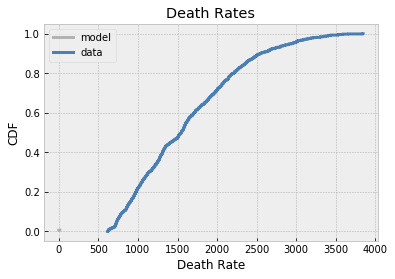

In [67]:
#Estimate parameters
mu, var = thinkstats2.TrimmedMeanVar(DR, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(DR, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Death Rates',
                 xlabel='Death Rate',
                 ylabel='CDF')

The model fits the data well.

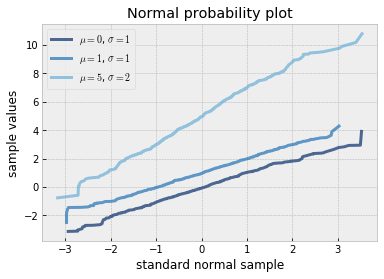

In [66]:
n = 1000
thinkplot.PrePlot(3) 

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample',
                 ylabel='sample values')

This is a visual test for normality. Our plot shows that the plot is approximately straight if the data are in fact part of a normal distribution.

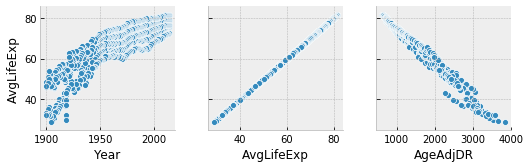

In [68]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['AvgLifeExp'])

We can clearly identify the relationships with Average Life Expectancy. The year has a generally linear relationship, and the Age-Adjusted Death Rate has a negative linear relationship.

In [69]:
df_num_corr = df_num.corr()['AvgLifeExp'][:-2] # -1 because the 2nd to last row is AvgLifeExp
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with AvgLifeExp:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with AvgLifeExp:
Year    0.867954
Name: AvgLifeExp, dtype: float64


In [71]:
thinkstats2.Corr(df['AvgLifeExp'], np.log(df['AgeAdjDR']))

-0.9553238874847483

In [72]:
thinkstats2.Corr(df['AvgLifeExp'], np.log(df['Year']))

0.8694434928331325

In [74]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [75]:
Cov(df['AvgLifeExp'], df['AgeAdjDR'])

-7865.1007894419945

In [76]:
Cov(df['AvgLifeExp'], df['Year'])

339.4392270531401

In [77]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [78]:
class LifeExpTest(HypothesisTest):

    def TestStatistic(self, data):
        heads, tails = data
        test_stat = abs(heads - tails)
        return test_stat

    def RunModel(self):
        heads, tails = self.data
        n = heads + tails
        sample = [random.choice('HT') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['H'], hist['T']
        return data

In [82]:
from scipy.stats import ttest_1samp

In [85]:
#Test whether average life expectancy is 65 years or not:

exp = np.mean(df['AvgLifeExp'])

print(exp)

tset, pval = ttest_1samp(exp, 65)
print('p-values',pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("We reject null hypothesis")
else:
  print("We accept the null hypothesis")

64.11729468599037
p-values nan
We accept the null hypothesis


C:\Users\LLClasen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\LLClasen\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\LLClasen\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\LLClasen\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\LLClasen\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [87]:
import statsmodels.formula.api as smf

formula = 'AgeAdjDR ~ AvgLifeExp'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AgeAdjDR   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 4.059e+04
Date:                Sun, 02 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:20:06   Log-Likelihood:                -6300.1
No. Observations:                1035   AIC:                         1.260e+04
Df Residuals:                    1033   BIC:                         1.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5254.8465     18.336    286.583      0.000    5218.866    5290.827
AvgLifeExp   -56.6703      0.281   -201.480      0.000     -57.222     -56.118
==============================================================================
Omnibus:                       65.562   Durbin-Watson:                   0.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.656
Skew:                          -0.224   Prob(JB):                     5.45e-48
Kurtosis:                       5.202   Cond. No.                         361.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
inter = results.params['Intercept']
slope = results.params['AvgLifeExp']
inter, slope

(5254.846530593257, -56.67025347813667)

In [89]:
slope_pvalue = results.pvalues['AvgLifeExp']
slope_pvalue

0.0

In [90]:
results.rsquared

0.9751843738839916